In [6]:

import os

# Aktuelles Arbeitsverzeichnis anzeigen
print("Aktuelles Verzeichnis:", os.getcwd())

import pandas as pd

mr1 = pd.read_csv('sr_aufg_4_54_MR1.txt', sep=r'\s+', decimal=',', header=None, names=['Wert'])
mr2 = pd.read_csv('sr_aufg_4_54_MR2.txt', sep=r'\s+', decimal=',', header=None, names=['Wert'])
mr3 = pd.read_csv('sr_aufg_4_54_MR3.txt', sep=r'\s+', decimal=',', header=None, names=['Wert'])


Aktuelles Verzeichnis: C:\Users\adam8\OneDrive\programmieren\coding\python\Statistik\testat4


## 2. Kennzahlen bestimmen
Berechnen Sie für jeden der drei Messreihen **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite**.

***Beispiellösung:***<br>
Bitte geben Sie die Kennzahlen in tabellarischer Form ab.

In [11]:
import pandas as pd

# Funktion zur Berechnung der Kennzahlen
def berechne_kennzahlen(df):
    return {
        'Mittelwert': df['Wert'].mean(),
        'emp. Varianz': df['Wert'].var(ddof=0),
        'emp. Standardabw.': df['Wert'].std(ddof=0),
        'Median': df['Wert'].median(),
        'Spannweite': df['Wert'].max() - df['Wert'].min()
    }

# Berechnung für jede Messreihe
kennzahlen = pd.DataFrame({
    'MR1': berechne_kennzahlen(mr1),
    'MR2': berechne_kennzahlen(mr2),
    'MR3': berechne_kennzahlen(mr3)
})

# Transponieren für bessere Darstellung
kennzahlen = kennzahlen.T
kennzahlen.index.name = 'Messreihe'
print("Varianz MR1 (ddof=0):", mr1['Wert'].var(ddof=0))
print("Standardabw. MR1 (ddof=0):", mr1['Wert'].std(ddof=0))

# Anzeigen der Tabelle
# Anzeigen der gerundeten Tabelle
kennzahlen = kennzahlen.round(4)
kennzahlen



Varianz MR1 (ddof=0): 5.297026127490999
Standardabw. MR1 (ddof=0): 2.3015269121804764


,Mittelwert,emp. Varianz,emp. Standardabw.,Median,Spannweite
Messreihe,,,,,
MR1,3.9667,5.2970,2.3015,3.7348,5.9842
MR2,19.3989,0.1548,0.3934,19.2978,1.9857
MR3,582.9184,3.9615,1.9904,582.9627,9.8892


## 3. Histogramme erstellen
Erstellen Sie für jeden der drei Messreihen ein Histogramm. <br>
Erläutern Sie hierzu auch die Wahl der Klassen: 
- Wie viele Klassen haben Sie gewählt (und warum diese Anzahl von Klassen)? 
- Wie haben Sie die Klassengrenzen festgelegt und warum? Welche Funktion haben Sie beim Auszählen benutzt?

***Beispiellösung:***<br>
Darstellung aller 3 Histogramme mit zusätzlich der Beantwortung der Fragen.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funktion zur automatisierten Histogrammerstellung
def histogramm_erstellen(df, name, bins='sturges'):
    werte = df['Wert']
    plt.figure(figsize=(6, 4))
    counts, bin_edges, patches = plt.hist(werte, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogramm {name}')
    plt.xlabel('Wert')
    plt.ylabel('Häufigkeit')
    plt.grid(True)
    plt.show()
    print(f"{name} – Anzahl Klassen: {len(bin_edges)-1}")
    print(f"Klassen-Grenzen: {bin_edges.round(2)}")
    return counts, bin_edges

# Histogramme erzeugen
counts_MR1, bins_MR1 = histogramm_erstellen(mr1, 'MR1')
counts_MR2, bins_MR2 = histogramm_erstellen(mr2, 'MR2')
counts_MR3, bins_MR3 = histogramm_erstellen(mr3, 'MR3')

^### Aufgabe 4c – Histogramme und Klasseneinteilung

Für jede der drei Messreihen wurde ein Histogramm erstellt. Die Anzahl der Klassen wurde mit der **Sturges-Regel** automatisch bestimmt, da sie sich gut für mittelgroße Stichproben eignet:

> **Formel:** k = ⌈log₂(n) + 1⌉

---

#### 📊 MR1
- **Anzahl Klassen:** 8
- **Klassengrenzen:** [1.01, 1.76, 2.51, 3.25, 4.0, 4.75, 5.5, 6.25, 6.99]
- **Beobachtung:** Die Verteilung ist **asymmetrisch** (zwei Häufungen), **nicht glockenförmig** → vermutlich **keine Normalverteilung**.

---

#### 📊 MR2
- **Anzahl Klassen:** 8
- **Klassengrenzen:** [19.0, 19.25, 19.5, 19.75, 20.0, 20.24, 20.49, 20.74, 20.99]
- **Beobachtung:** Stark **rechtsschiefe Verteilung**, konzentriert auf niedrigere Werte → ebenfalls **keine Normalverteilung**.

---

#### 📊 MR3
- **Anzahl Klassen:** 8
- **Klassengrenzen:** [578.04, 579.27, 580.51, 581.75, 582.98, 584.22, 585.45, 586.69, 587.93]
- **Beobachtung:** Die Verteilung ist **symmetrisch, glockenförmig** → spricht für eine **Normalverteilung**.

---

#### 📌 Technische Umsetzung:
- Zur Erstellung der Histogramme wurde die Funktion `plt.hist()` aus `matplotlib` verwendet.
- Diese basiert auf `numpy.histogram()` und liefert sowohl die Häufigkeiten als auch die automatisch berechneten Klassengrenzen.
- Die Klassengrenzen wurden so gewählt, dass alle Klassen **gleich breit** sind – das erleichtert die visuelle Interpretation und Vergleichbarkeit.



## 4. Normalverteilte Daten erkennen
Entscheiden Sie anhand des Histogramms für jede der drei Messreihen, ob eine Normalverteilung vorliegt. Begründen Sie Ihre Entscheidung.

## 5. Dichtekurve der Normalverteilung einzeichnen
Sofern bei einer Messreihe eine Normalverteilung vorliegt, erstellen Sie ein weiteres Diagramm, das sowohl das Histogramm als auch die (an das Histogramm angepasste) Dichtekurve der passenden Normalverteilung zeigt.
- Welche Normalverteilungsdichte haben Sie gezeichnet, d. h., welche Werte haben Sie für die Parameter $\mu$ bzw. $\sigma$ eingesetzt?

***Beispiellösung*** (für den Fall, dass bei Messreihe MR1 eine Normalverteilung vorliegt):
<div>
<img src="https://drive.google.com/uc?id=1iVJQvjVW9mvBWJ_V3a4rUMJ-fdgbzqg4" width="500"/>
</div>

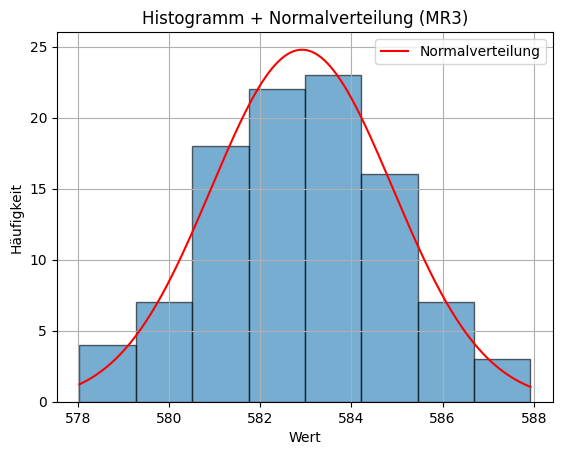

μ (Mittelwert) = 582.9184
σ (Standardabweichung) = 1.9904


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Werte von MR3
werte = mr3['Wert']
mu = werte.mean()
sigma = werte.std(ddof=0)

# Histogramm berechnen
anzahl_klassen = 8
counts, bins, _ = plt.hist(werte, bins=anzahl_klassen, density=False, edgecolor='black', alpha=0.6)

# Dichtekurve vorbereiten
x = np.linspace(bins[0], bins[-1], 1000)
klassenbreite = bins[1] - bins[0]
skalierung = len(werte) * klassenbreite  # wichtig, um Dichtekurve an Histogramm anzupassen
dichte = norm.pdf(x, mu, sigma) * skalierung

# Plot zeichnen
plt.plot(x, dichte, color='red', label='Normalverteilung')
plt.title('Histogramm + Normalverteilung (MR3)')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(True)
plt.show()

# Ausgabe der Parameter
print(f"μ (Mittelwert) = {mu:.4f}")
print(f"σ (Standardabweichung) = {sigma:.4f}")


### Aufgabe 4e – Histogramm mit Dichtekurve (MR3)

Für Messreihe MR3 liegt eine Normalverteilung vor. Die folgende Abbildung zeigt das Histogramm zusammen mit der angepassten Dichtekurve.

**Verwendete Parameter der Normalverteilung:**
- Mittelwert (μ): 582.9184
- Standardabweichung (σ): 1.9904

Die Dichtekurve wurde so skaliert, dass sie mit dem Histogramm vergleichbar ist:
**Skalierungsfaktor** = Anzahl Messwerte × Klassenbreite.


## 6. Erläuterungen zur Dichtekurve
Erläutern Sie zu dem bei 5. gezeichneten Diagramm:
- Um welchen Faktor unterscheiden sich die im Histogramm dargestellten Anzahlen von den Funktionswerten der Normalverteilungsdichte?
- Wie haben Sie diesen Faktor bei der Erstellung des Diagramms berücksichtigt? Mussten Sie die Skalierung der y-Achse(n) ändern? Wenn ja, wie? Wenn nein, warum nicht?

### Aufgabe 4f – Erläuterung zur Dichtekurve und Skalierung

Die Funktionswerte der Normalverteilungsdichte (z. B. durch `scipy.stats.norm.pdf()`) sind **Wahrscheinlichkeitsdichten** – das bedeutet:

- Die Fläche unter der Kurve ergibt 1.
- Die y-Achse zeigt **keine absoluten Häufigkeiten**, sondern Dichten (also "Häufigkeit pro Intervalleinheit").

---

#### 🔍 Unterschied zum Histogramm:

Das Histogramm zeigt **absolute Häufigkeiten**, d. h. die Anzahl der Werte in jeder Klasse.
Daher unterscheiden sich die y-Werte der Dichtekurve vom Histogramm um den Faktor:

> **Faktor = Anzahl Werte × Klassenbreite**

In meinem Fall (MR3):

- Anzahl Werte = *n* = 100 (je nach Messreihe)
- Klassenbreite = berechnet aus Histogrammgrenzen, z. B. \( \text{bins}[1] - \text{bins}[0] \)

---

#### 🛠️ Berücksichtigung beim Plot:

Um die Dichtekurve an das Histogramm anzupassen, wurde sie wie folgt **skaliert**:

> `norm.pdf(x, mu, sigma) * n * klassenbreite`

Dadurch stimmen die Höhen der Kurve mit den Balken des Histogramms überein, ohne dass die y-Achse angepasst werden musste.

---

#### 📏 Fazit:

- **Ja**, es musste ein Skalierungsfaktor berücksichtigt werden.
- **Nein**, die y-Achse musste nicht manuell geändert werden – die Dichtekurve wurde direkt im y-Wert skaliert.
